In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')


In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [6]:
if 'method' in matches.columns:
    matches.drop(['method'], axis=1, inplace=True)

matches['city'] = matches['city'].fillna(matches['city'].mode()[0])
matches['player_of_match'] = matches['player_of_match'].fillna(matches['player_of_match'].mode()[0])
matches['winner'] = matches['winner'].fillna('No Result')
matches['target_runs'] = matches['target_runs'].fillna(matches['target_runs'].mean())
matches['target_overs'] = matches['target_overs'].fillna(matches['target_overs'].mean())
matches['result_margin'] = matches['result_margin'].fillna(0)

matches['date'] = pd.to_datetime(matches['date'])


In [7]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [10]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [11]:
if 'extras_type' in deliveries.columns:
    deliveries.drop(['extras_type'], axis=1, inplace=True)
if 'fielder' in deliveries.columns:
    deliveries.drop(['fielder'], axis=1, inplace=True)

deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('No Player Dismissed')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('Not Dismissed')


In [12]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
is_wicket           0
player_dismissed    0
dismissal_kind      0
dtype: int64

Matches per Season

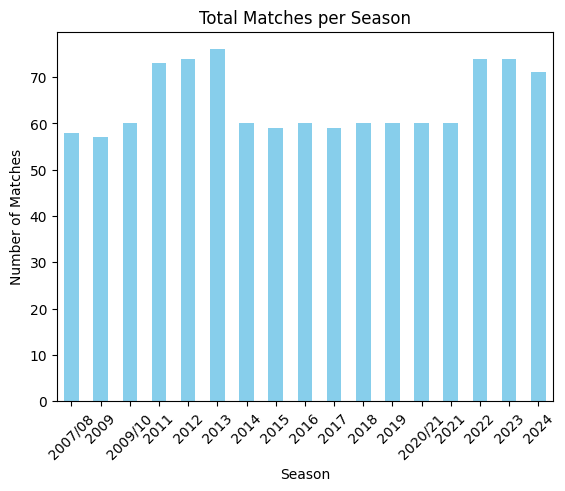

In [20]:
season_matches = matches['season'].value_counts().sort_index()
season_matches.plot(kind='bar', color='skyblue')
plt.title("Total Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()


Top Winning Teams


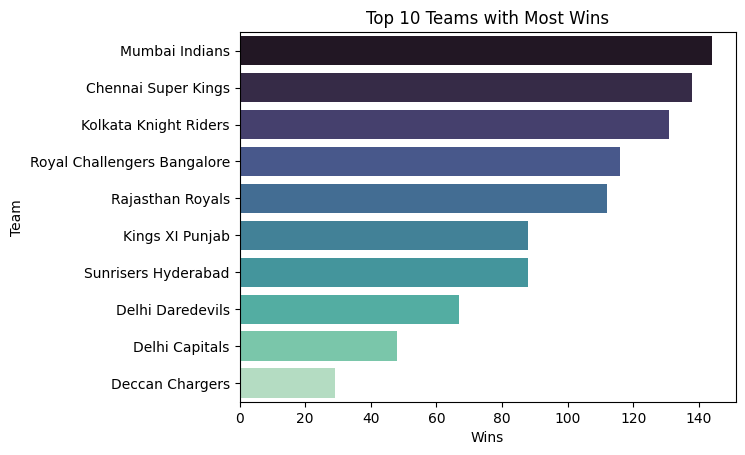

In [21]:
top_teams = matches['winner'].value_counts().head(10)
sns.barplot(y=top_teams.index, x=top_teams.values, hue=top_teams.index, legend=False, palette='mako')
plt.title("Top 10 Teams with Most Wins")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()


Toss Winner vs Match Winner

In [22]:
toss_match = matches[matches['toss_winner'] == matches['winner']]
percentage = len(toss_match) / len(matches) * 100
print(f"{percentage:.2f}% of the time, the toss winner also won the match.")


50.59% of the time, the toss winner also won the match.


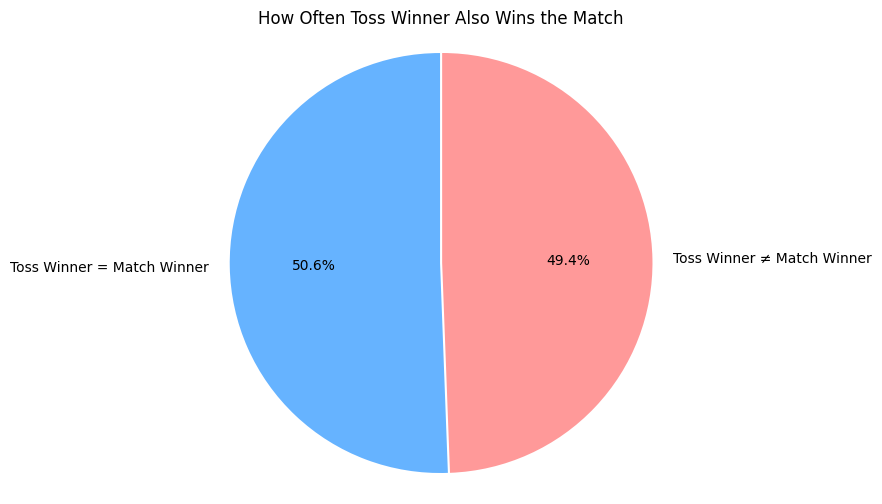

In [23]:
toss_win_and_match_win = len(toss_match)
toss_win_only = len(matches) - toss_win_and_match_win

labels = ['Toss Winner = Match Winner', 'Toss Winner ≠ Match Winner']
values = [toss_win_and_match_win, toss_win_only]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.01, 0))
plt.title('How Often Toss Winner Also Wins the Match')
plt.axis('equal')  # Equal aspect ratio makes the pie round.
plt.show()

Top 10 Batsmen (Total Runs)

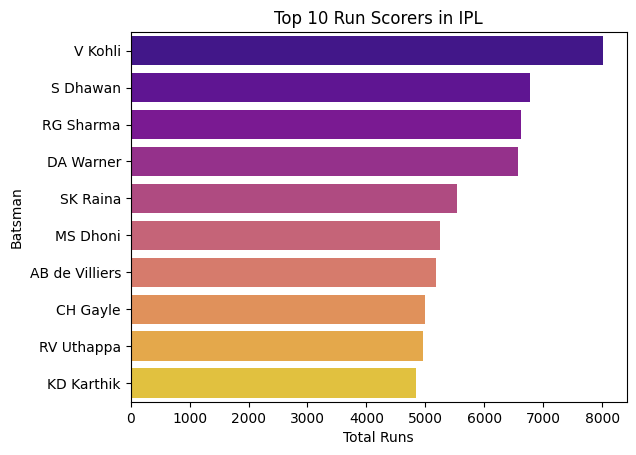

In [33]:
top_batsman = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_batsman.values, y=top_batsman.index, hue=top_batsman.index, legend=False, palette='plasma')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()


Top 10 Wicket Takers

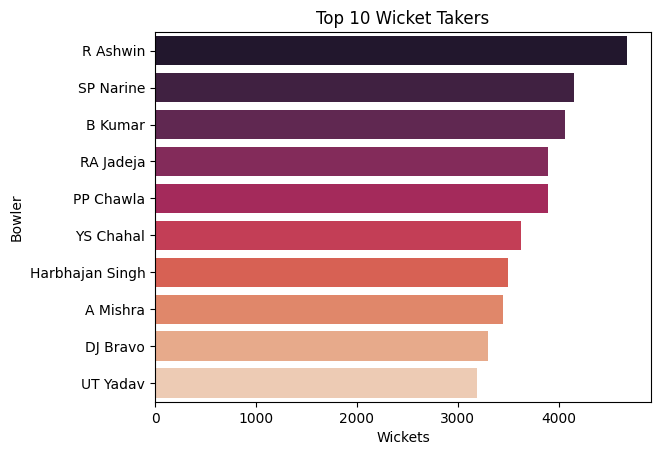

In [34]:
wickets = deliveries[deliveries['dismissal_kind'] != 'not dismissed']
top_bowlers = wickets['bowler'].value_counts().head(10)
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, hue=top_bowlers.index, legend=False, palette='rocket')
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


### 🔍 Insights:
- MI and CSK are among the most successful teams.
- Toss winners win ~50% of matches.
- Virat Kohli leads run scoring; R Ashwin tops bowling.
- IPL has grown in number of matches per season.
